### Notebook Goal

This notebook is dedicated to the metric of money and profit, especially in reference to genre and production studios. David's notebook is centered more on popularity and consumer interaction. By examining both of these metrics, we can offer Microsoft multiple perspectives to consider and a more wholistic view of the movie industry they wish to enter.

### Import Data Frames

Data came from 'The Numbers', 'Box Office Mojo', and 'IMDB'

In [2]:
import pandas as pd

In [3]:
imdb_df = pd.read_csv('https://raw.githubusercontent.com/vimixy/Movie-Analysis-Project/main/imdbCSV.csv')

That was way too much data, so we simplify to relevant columns.

In [4]:
imdb_df_new = imdb_df.drop(columns = ['Unnamed: 0', 'primary_title', 'movie_id.1', 'movie_id.2', 'person_id.1', 'birth_year', 'death_year', 'primary_profession'])

In [5]:
url = 'https://drive.google.com/file/d/1pf2H2ygxpI7SU4vGY0r6ZQ4GJBB5bJQf/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
bom_df = pd.read_csv(url)

In [6]:
url3 = 'https://drive.google.com/file/d/1QvKjFY_Wp9sekvvl-My5InYCFH-BJct5/view'
url3 = 'https://drive.google.com/uc?id=' + url3.split('/')[-2]
tn_df = pd.read_csv(url3)

In [7]:
#imdb_df.info()

In [8]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/vimixy/Movie-Analysis-Project/main/movie_info')

Here I am converting the columns regarding money to display data as floats, not currency, so that it is easier to manipulate. 

In [9]:
movies_df[['production_budget', 'domestic_gross_y', 'worldwide_gross']] = movies_df[['production_budget', 'domestic_gross_y', 'worldwide_gross']].replace(r'[^.0-9]', '', regex = True).astype(float)



In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In order to understand how much profit each movie generated, I subtract production budget from the worldwide gross to create a true Profit column. I also created a new Dataframe, working_df, with specifically chosen columns that show more valuable and interpretable data.

In [11]:
movies_df['Profit'] = movies_df['worldwide_gross'] - movies_df['production_budget']
pd.set_option('max_columns', None)

In [12]:
working_df = movies_df[['studio', 'year', 'original_title', 'popularity', 'vote_average', 'vote_count', 'production_budget', 'domestic_gross_y', 'worldwide_gross', 'Profit']]

Here I merge dataframes (using their movie titles) so that I can have access to the genre category in reference to each movie. Then, I simplfy the table to show only columns I wish to visualize.

In [13]:
working_df_test = working_df.merge(imdb_df_new, left_on = 'original_title', right_on = 'original_title')

In [14]:
films_df = working_df_test.drop(columns = ['vote_average', 'vote_count', 'start_year', 'person_id'])

In [15]:
concise_table = films_df[['original_title', 'Profit', 'genres']]

In order to manipulate the data and display it visually, I have to split and explode the genre column as it contains multiple values.

In [16]:
concise_table['genres'] = concise_table['genres'].str.split(',')

<ipython-input-16-c191d745f0c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_table['genres'] = concise_table['genres'].str.split(',')


In [17]:
concise_table = concise_table.explode('genres', ignore_index = False)

Finally I am able to consolidate the data down to the two variables I want to compare: genre and profit. Profit is the representation of the average profit made per movie; in this table, it is the average profit per movie categorized by genre. Animation seems to be the most lucrative genre (low production cost, high consumption = biggest profit per movie).

In [18]:
genre_profit = concise_table.groupby('genres')['Profit'].mean().sort_values()[::-1]

In [64]:
genre_profit

genres
Animation     370245425.52532
Adventure     292257869.41439
Sci-Fi        282110424.19048
Sport         227532730.05714
Action        179669894.86073
Fantasy       163478005.84112
Comedy        156431055.11561
Family        128398082.93590
Musical       127283484.28571
Western       122122654.33333
Documentary   113086611.80645
Thriller       99176295.87407
History        96877763.72340
Music          92558387.83333
Horror         85937850.86842
Biography      82386721.75000
Mystery        78394053.69925
Drama          74767564.19014
Crime          66861746.31441
Romance        62917695.45062
War            40749265.00000
News           28031715.00000
Name: Profit, dtype: float64

Time to visualize!

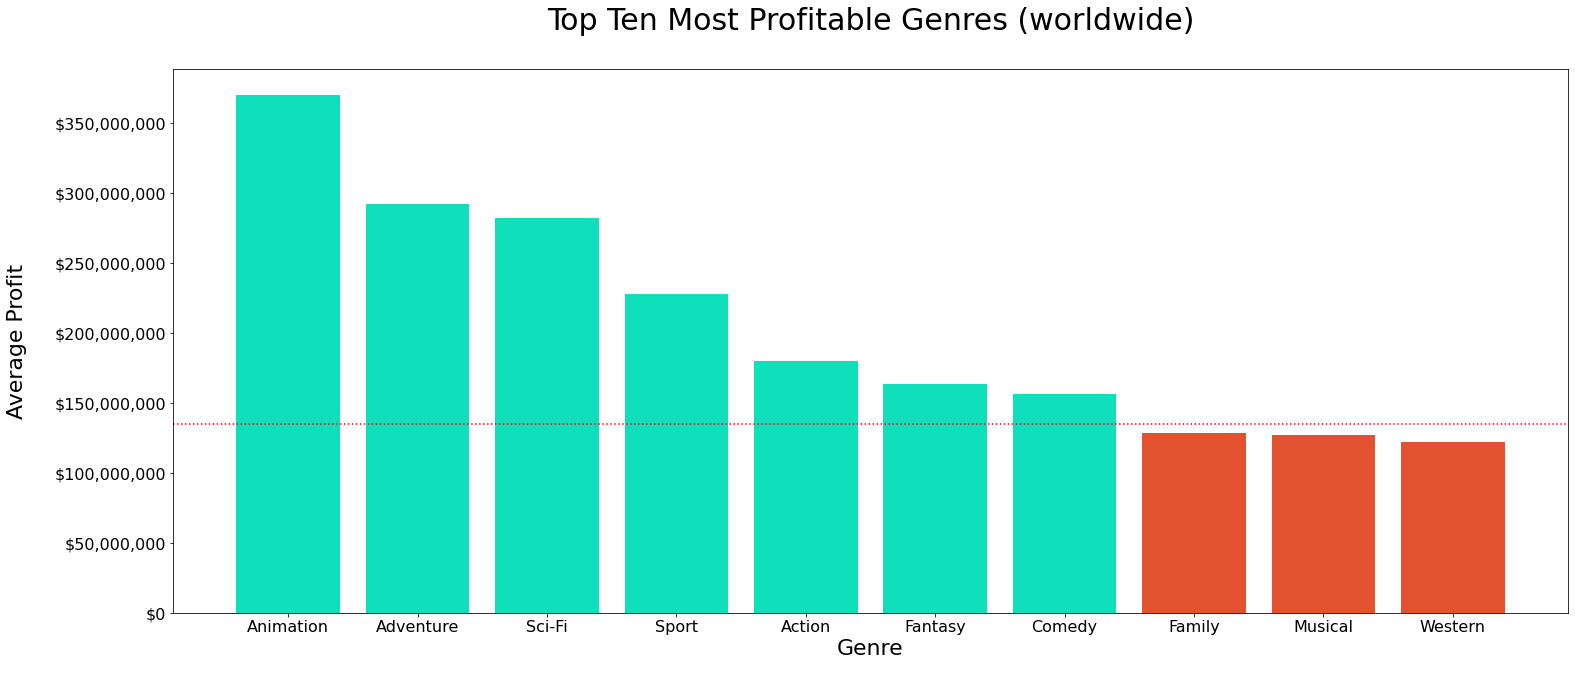

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots(figsize = (25,10))
x = genre_profit.index
height = genre_profit.values

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.axhline(genre_profit.values.mean(), color = 'red', ls = 'dotted')

colors = ['#10DFBC' if val > 1.5*10**8 else '#E2522F' for val in height]


ax.bar(x[:10], height[:10], color=colors)
ax.set_title('Top Ten Most Profitable Genres (worldwide)\n', fontsize = 30)
ax.set_xlabel('Genre\n', fontsize = 22)
ax.set_ylabel('Average Profit\n', fontsize = 22);

Here we shift our focus to data on the studios. 

In [20]:
studios_table = films_df[['studio', 'original_title', 'Profit', 'genres', 'primary_name']]

In order to have accurate data, I had to rename some studios that were being represented sepereately, when in reality, they are the same entity. This comes from a messy merge, but is an easy fix.

In [21]:
studios_table['studio'].replace({'WB (NL)': 'WB'}, inplace = True)

/Users/tomsmith/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
studios_table['studio'].replace({'BV': 'BV (Disney)', 'SPC': 'Sony'}, inplace = True)

In [23]:
studios_table['genres'] = studios_table['genres'].str.split(',')

<ipython-input-23-f398604f63c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studios_table['genres'] = studios_table['genres'].str.split(',')


Here I am creating a pivot table to visualize seperate variables: Top 3 most profitable studios (shown later, but are Universal, Warner Bros, and Fox, all of which are way behind Disney, but Disney will be Microsofts biggest competiton and will not be interested in any type of partnership, merge, or buyout), genre, and the resulting data is an average profit per movie of each studio in each genre.

In [24]:
studio_genre_df = pd.pivot_table(studios_table.explode('genres'), index = 'genres', columns = 'studio', values = 'Profit', aggfunc = 'mean')[['Uni.', 'WB', 'Fox']]



In [25]:
studio_genre_df.head()

studio,Uni.,WB,Fox
genres,,,
Action,139492049.00000,202427659.08333,226359473.61224
Adventure,308539210.22727,237572236.48000,276706092.43548
Animation,736637264.31250,80827802.33333,299073442.28571
Biography,50728870.77273,126272174.66667,227834319.46154
Comedy,249841981.16667,79530880.46774,162771625.03125


Here I am specifying the top 5 most profitable genres and will compare how the top three most profitable studios perform in each genre category.

In [26]:
top_genre_per_studio = studio_genre_df.loc[['Animation', 'Adventure', 'Sci-Fi', 'Sport', 'Action']]

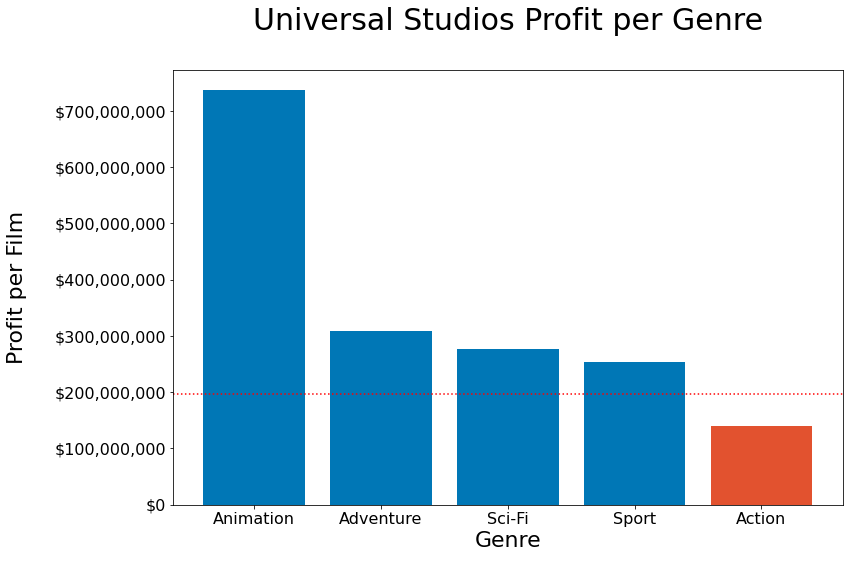

In [60]:
x = top_genre_per_studio.index
height = top_genre_per_studio['Uni.'].values
colors = ['#0077b6' if val > 1.5*10**8 else '#E2522F' for val in height]
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(color=colors, x=x, height=height)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16, rotation = 0)
plt.yticks(fontsize = 16)
plt.axhline(studio_genre_df['Uni.'].mean(), color = 'red', ls = 'dotted')


ax.set_title('Universal Studios Profit per Genre\n', fontsize = 30)
ax.set_xlabel('Genre\n', fontsize = 22)
ax.set_ylabel('Profit per Film\n', fontsize = 22);

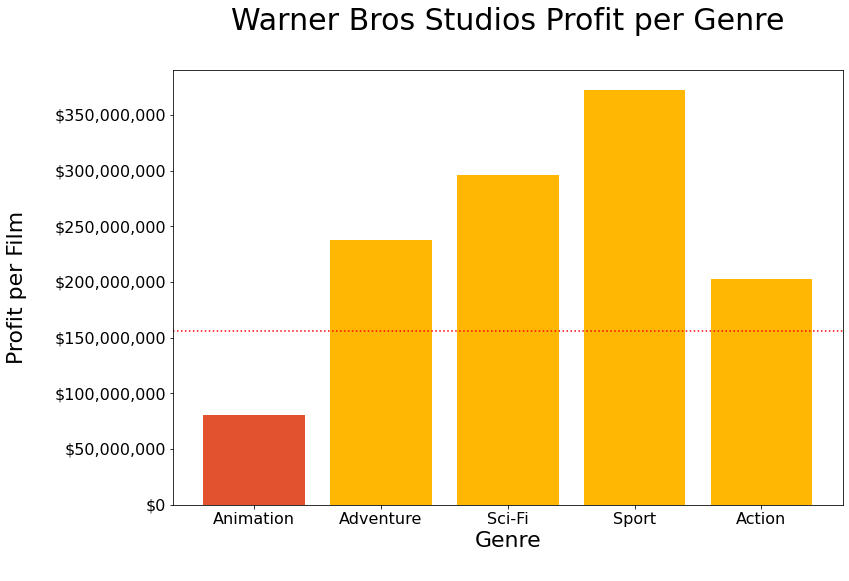

In [61]:
x = top_genre_per_studio.index
height = top_genre_per_studio['WB'].values
colors = ['#E2522F' if val < 2*10**8 else '#ffb703' for val in height]
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(color = colors, x=x, height=height)


ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16, rotation = 0)
plt.yticks(fontsize = 16)
plt.axhline(studio_genre_df['WB'].mean(), color = 'red', ls = 'dotted')

ax.set_title('Warner Bros Studios Profit per Genre\n', fontsize = 30)
ax.set_xlabel('Genre\n', fontsize = 22)
ax.set_ylabel('Profit per Film\n', fontsize = 22);

In [29]:
height

array([3.70245426e+08, 2.92257869e+08, 2.82110424e+08, 2.27532730e+08,
       1.79669895e+08, 1.63478006e+08, 1.56431055e+08, 1.28398083e+08,
       1.27283484e+08, 1.22122654e+08, 1.13086612e+08, 9.91762959e+07,
       9.68777637e+07, 9.25583878e+07, 8.59378509e+07, 8.23867218e+07,
       7.83940537e+07, 7.47675642e+07, 6.68617463e+07, 6.29176955e+07,
       4.07492650e+07, 2.80317150e+07])

In [30]:
['#669bbc' if val < 1.3*10**8 else '#4f772d' for val in height]

['#4f772d',
 '#4f772d',
 '#4f772d',
 '#4f772d',
 '#4f772d',
 '#4f772d',
 '#4f772d',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc',
 '#669bbc']

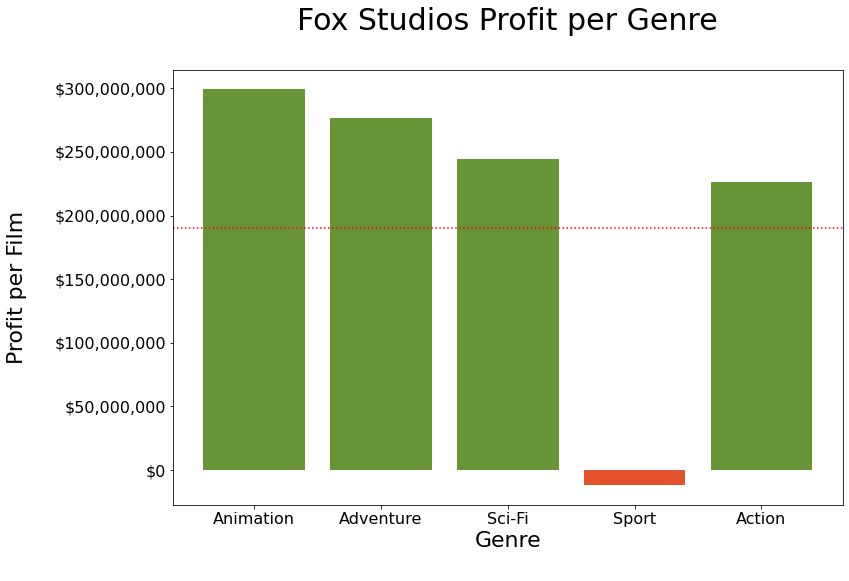

In [62]:
fox_mean = studio_genre_df['Fox'].mean()
x = top_genre_per_studio.index
height = top_genre_per_studio['Fox'].values
colors = ['#E2522F' if val < 1.3*10**8 else '#679436' for val in height]
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(x=x, height=height, color=colors)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16, rotation = 0)
plt.yticks(fontsize = 16)
plt.axhline(fox_mean, color = 'red', ls = 'dotted')

ax.set_title('Fox Studios Profit per Genre\n', fontsize = 30)
ax.set_xlabel('Genre\n', fontsize = 22)
ax.set_ylabel('Profit per Film\n', fontsize = 22);

In [32]:
fox_mean

190134079.36811692

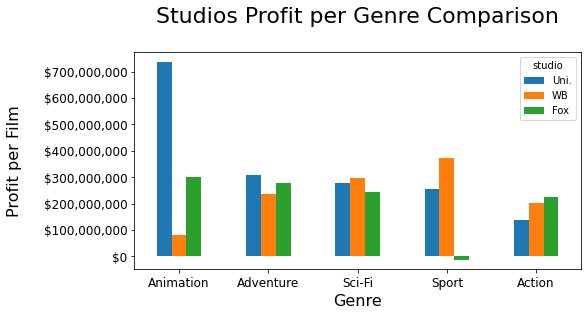

In [33]:
fig, ax = plt.subplots(figsize = (12,8))
studio_average_profit_per_genre_df = studio_genre_df.loc[['Animation', 'Adventure', 'Sci-Fi', 'Sport', 'Action']].plot.bar(figsize = (8,4), ax = ax)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

ax.set_title('Studios Profit per Genre Comparison\n', fontsize = 22)
ax.set_xlabel('Genre\n', fontsize = 16)
ax.set_ylabel('Profit per Film\n', fontsize = 16);



In [34]:
studio_genre_df.index

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object', name='genres')

### Average Profit per film of each studio

In [35]:
studios_profit = studios_table.groupby('studio')['Profit'].mean().sort_values()[::-1]
studios_profit

studio
BV (Disney)   447822982.29661
P/DW          405980087.30769
GrtIndia      233502914.00000
Fox           175252967.74675
WB            157713701.73869
                    ...      
Amazon        -12965385.00000
OMNI/FSR      -13906275.00000
MNE           -14135452.00000
VE            -29351401.00000
Free          -36109895.00000
Name: Profit, Length: 64, dtype: float64

### Top 6 studios producing the most films

In [36]:
common_studios = studios_table['studio'].value_counts()[:6]
common_studios

Uni.           255
WB             199
Fox            154
BV (Disney)    118
Sony           110
Par.           102
Name: studio, dtype: int64

In [37]:
universal_df = studios_table[studios_table['studio'] == 'Uni.']

In [38]:
universal_df['Profit'].mean()

154167726.47843137

In [39]:
warner_df = studios_table[studios_table['studio'] == 'WB']

In [40]:
warner_df['Profit'].sum()

31385026646.0

In [41]:
for studio in common_studios.index:
    print(studio)

Uni.
WB
Fox
BV (Disney)
Sony
Par.


In [42]:
studio_dfs = []

for studio in common_studios.index:
    print(studio)
    studio_df = studios_table[studios_table['studio'] == studio]
    studio_df.head()
    studio_dfs.append(studio_df)

Uni.
WB
Fox
BV (Disney)
Sony
Par.


In [43]:
#studio_dfs[0]

In [44]:
#for studio in studio_dfs:
   # print(studio['studio'], studio['Profit'].sum())

### Isolate movies produced by the top 6 production studios

In [45]:
top_studios = pd.concat(studio_dfs)
top_studios

,studio,original_title,Profit,genres,primary_name
7,Uni.,Despicable Me,474464573.00000,"[Animation, Comedy, Family]",Chris Renaud
8,Uni.,Despicable Me,474464573.00000,"[Animation, Comedy, Family]",Pierre Coffin
16,Uni.,Robin Hood,112459006.00000,"[Action, Adventure, Drama]",Ridley Scott
17,Uni.,Robin Hood,112459006.00000,"[Action, Adventure, Thriller]",Otto Bathurst
18,Uni.,Robin Hood,112459006.00000,"[Action, Drama]",Martin Schreier
...,...,...,...,...,...
1457,Par.,Bumblebee,363195589.00000,"[Action, Adventure, Sci-Fi]",Travis Knight
1462,Par.,A Quiet Place,317522294.00000,"[Drama, Horror, Sci-Fi]",John Krasinski
1463,Par.,A Quiet Place,317522294.00000,[Documentary],Sjoerd Oostrik
1487,Par.,Instant Family,71736188.00000,"[Comedy, Drama]",Sean Anders


### Average Profit per movie of the top 6 studios 

In [46]:
top_studios_profit = top_studios.groupby('studio')['Profit'].mean().sort_values()[::-1]

In [47]:
top_studios_profit

studio
BV (Disney)   447822982.29661
Fox           175252967.74675
WB            157713701.73869
Uni.          154167726.47843
Sony          146782063.41818
Par.          129353472.11765
Name: Profit, dtype: float64

### Visualize

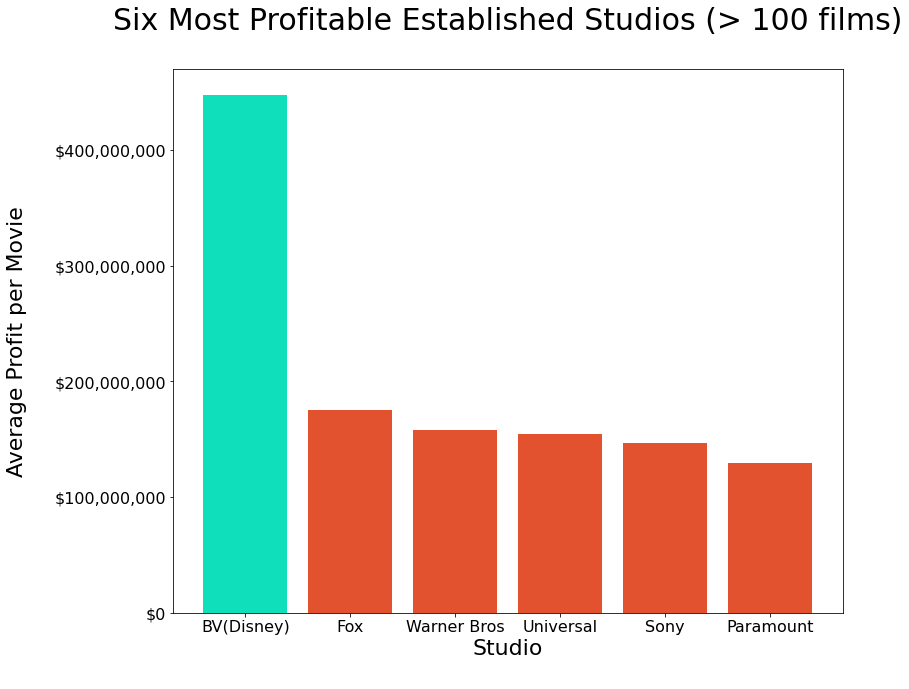

In [63]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots(figsize = (12,10))
x = ['BV(Disney)', 'Fox', 'Warner Bros', 'Universal', 'Sony', 'Paramount']
height = top_studios_profit.values

colors = ['#10DFBC' if val > 2*10**8 else '#E2522F' for val in height]

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax.bar(x, height, color=colors)
ax.set_title('Six Most Profitable Established Studios (> 100 films)\n', fontsize = 30)
ax.set_xlabel('Studio\n', fontsize = 22)
ax.set_ylabel('Average Profit per Movie\n', fontsize = 22);